In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Make sure that caffe is on the python path:
caffe_root = '../../'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')
#print sys.path

import caffe

../../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
../../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
../../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [2]:
import cv2

In [3]:
caffe.set_mode_gpu()
net = caffe.Net(caffe_root + 'models/swimmers_fullconv/swimmers_fullconv.prototxt', 
                caffe_root + 'models/swimmers_fullconv/out_new_big.binaryproto', caffe.TEST)
net.reshape()

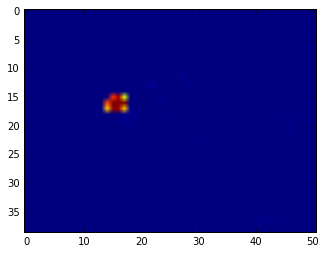

In [5]:
image = caffe.io.load_image(caffe_root + 'models/swimmers_fullconv/swimmer01.jpg')
im_resized = cv2.resize(image, (1800,1440))
# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
mu = np.array([103.9, 116.8, 123.68])
transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

transformed_image = transformer.preprocess('data', image)
# copy the image data into the memory allocated for the net
net.blobs['data'].data[...] = transformed_image

### perform classification
output = net.forward()
#print  net.blobs['idprclasses'].data

firstMap = net.blobs['idprclasses'].data[0,0,:,:].copy()
plt.imshow(firstMap)

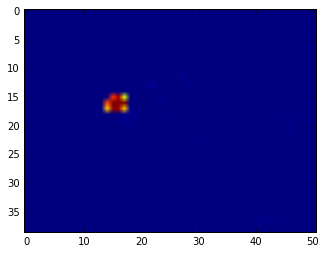

In [6]:
net = None
net = caffe.Net(caffe_root + 'models/swimmers_fullconv/swimmers_fullconv.prototxt', 
                caffe_root + 'models/swimmers_fullconv/out_new_big.binaryproto', caffe.TEST)
net.reshape()
image = caffe.io.load_image(caffe_root + 'models/swimmers_fullconv/swimmer01.jpg')
im_resized = cv2.resize(image, (1800,1440))
# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
mu = np.array([103.9, 116.8, 123.68])
transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

transformed_image = transformer.preprocess('data', image)
# copy the image data into the memory allocated for the net
net.blobs['data'].data[...] = transformed_image

### perform classification
output = net.forward()
#print  net.blobs['idprclasses'].data

secondMap = net.blobs['idprclasses'].data[0,0,:,:].copy()
plt.imshow(secondMap)

0.00524185
0.00524185
0.0
0.0


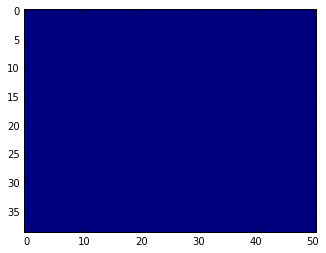

In [7]:
diff = secondMap - firstMap
print(np.mean(firstMap))
print(np.mean(secondMap))
print(np.mean(diff))
print(np.max(np.abs(diff)))
plt.imshow(diff)

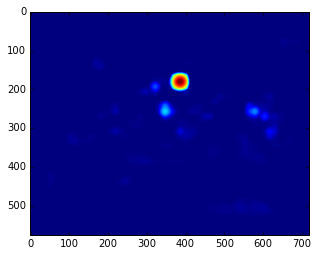

In [8]:
net.blobs['data'].data[...] = transformed_image#im_resized.reshape(1,3,1440,1800)
output = net.forward()
scndMap = net.blobs['idpr_dt'].data[0,1,:,:]
#print scndMap
plt.imshow(scndMap)

b = np.empty_like(scndMap)
b[:] = scndMap

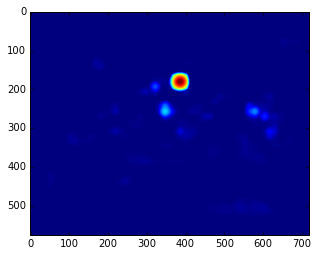

In [9]:
net.blobs['data'].data[...] = transformed_image#im_resized.reshape(1,3,1440,1800)
output = net.forward()
t = net.blobs['idpr_dt'].data[0,1,:,:]
#print scndMap
plt.imshow(t)

c = np.empty_like(t)
c[:] = t

0.0
0.0


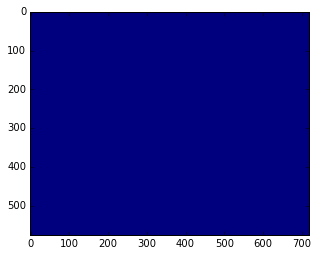

In [10]:
diff = c - b

print(np.mean(diff))
print(np.max(np.abs(diff)))
plt.imshow(diff)